# 10-8 多分类问题中的混淆矩阵

混淆矩阵天然地支持多分类问题。

这一节的例子，我们不对 digits 的数据进行极偏处理。原本 digits 问题就是一个多分类问题。我们使用逻辑回归来处理这个多分类问题。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.95

In [5]:
y_predict = log_reg.predict(X_test)
y_predict

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       5, 2, 3, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 8, 4, 2,
       8, 8, 7, 8, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 1, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 1, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 3, 5, 8, 7, 2, 5, 5, 9, 9, 9, 8, 1, 9, 4, 4, 8, 5, 1, 6, 4,
       4, 8, 1, 5, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 5, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 3, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 8, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 3, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 1, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 8, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

如果要计算多分类问题的精准度，要使用 average 参数，具体参数的含义，可以参考官方文档。

In [6]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average='micro')

0.95

[scikit-learn 官方文档： sklearn.metrics.precision_score](http://sklearn.apachecn.org/cn/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

## 下面我们来看一看这个多分类问题的混淆矩阵

这是我们这一节的重点。

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[37,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 34,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 28,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0,  1, 32]])

我们画出这个混淆矩阵的图形，直观感觉一下，我们的预测。

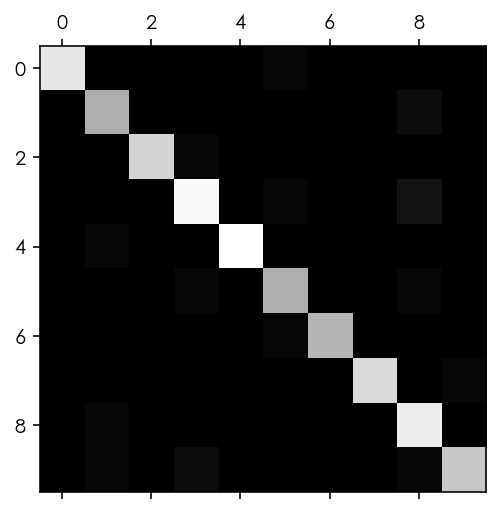

In [8]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

上面的图形中越亮的部分数值越大。

我们的处理策略。

+ 对每一行求和，是针对真实数据而言，得到的每一个数值，表示，我们对真实的数据预测错误的百分比

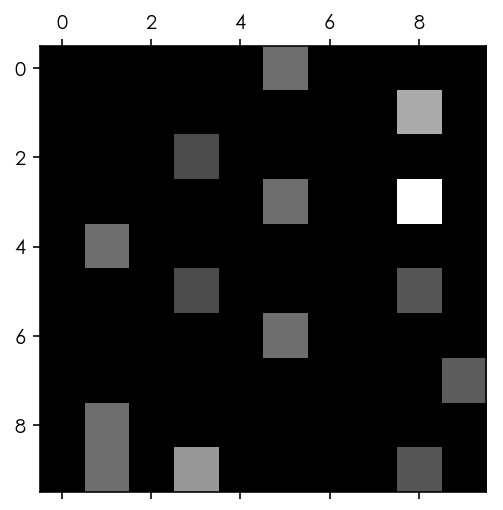

In [9]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)

plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()

从这个矩阵中，我们可以看到，真实的是 3 的数字，常常被预测为 8 ，是不是很有说服力，本来 3 和 8 的样子就很像。